# Problem Statement

## Predict a price range, indicating how high the price is, using K-Nearest Neighbors algorithm. 

In [1]:
# import libraries

In [2]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

## load and review data

In [3]:
df=pd.read_csv("Mobile_data.csv")

In [4]:
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [5]:
df.shape

(2000, 15)

In [6]:
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [7]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [8]:
# The columns sc_h and sc_w have nothing to do with the model attributes. So drop it.
df.drop(['sc_h','sc_w'], axis=1, inplace= True)

In [9]:
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,15,1


In [10]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
talk_time        0
price_range      0
dtype: int64

<AxesSubplot:>

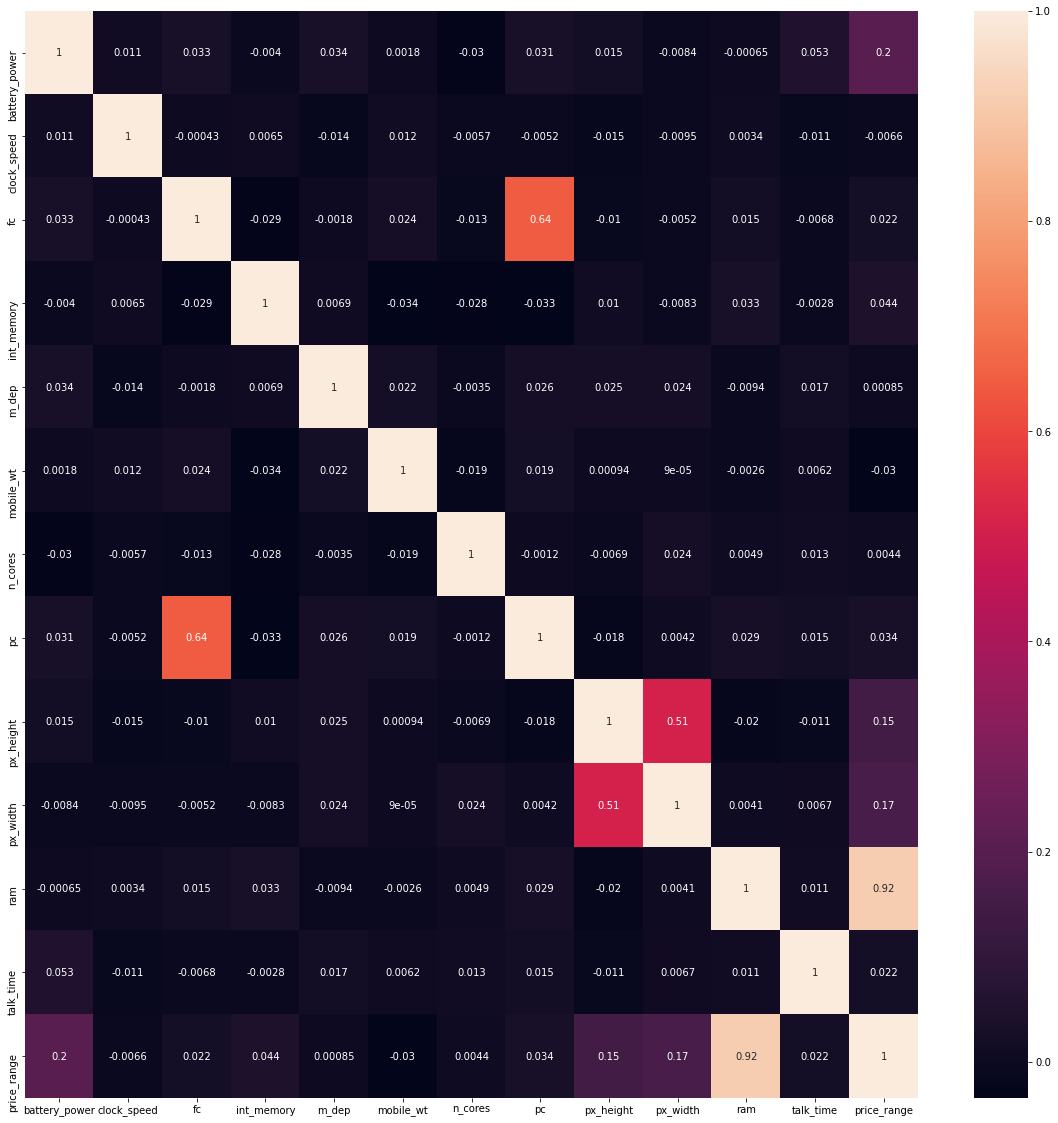

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)

In [12]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = df.drop(labels= "price_range" , axis = 1)
y = df["price_range"]
X.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,15


## Feature Scaling

In [13]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.128298e-16,-2.172151e-16,9.230117e-17,-8.754109e-17,-1.045830e-16,1.804112e-16,-4.690692e-17,1.669775e-16,1.287304e-16,5.595524e-17,-1.582068e-16,1.052491e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-1.253064e+00,-9.928904e-01,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.649584e+00
25%,-8.804033e-01,-1.007906e+00,-7.624947e-01,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-9.173306e-01
50%,-2.849593e-02,-2.727384e-02,-3.017032e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-2.013697e-03
75%,8.575560e-01,8.307794e-01,6.198797e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,9.133032e-01
max,1.728812e+00,1.811412e+00,3.384628e+00,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.645557e+00


In [14]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## Building kNN model

In [15]:
NNH = KNeighborsClassifier(n_neighbors= 9 ,metric='euclidean')

In [16]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

## Evaluate performance of kNN model

In [17]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.94

## model-2 using different scaling techniques 

### robust scaling

In [18]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [19]:
#Create copy of dataset.
df_model = df.copy()
#Rescaling features
scaler = RobustScaler()

In [20]:
features = [['int_memory', 'battery_power', 'n_cores', 'fc','pc', 'clock_speed']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
#Create KNN Object
knn = KNeighborsClassifier()

In [21]:
NNH = KNeighborsClassifier(n_neighbors= 11 ,metric='euclidean')

In [22]:
#Create x and y variable
x = df_model.drop(columns=['price_range'])
y = df_model['price_range']
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [23]:
#Training the model
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [24]:
#Predict testing set
y_pred = knn.predict(x_test)

In [25]:
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))

0.795


## standard scalar

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
features = [['battery_power','clock_speed','int_memory', 'n_cores', 'fc','pc']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
#Create KNN Object
knn = KNeighborsClassifier()

In [29]:
#Create x and y variable
x = df_model.drop(columns=['price_range'])
y = df_model['price_range']

In [30]:
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)


In [31]:
 KNeighborsClassifier(n_neighbors= 11 ,metric='euclidean')

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [32]:
#Training the model
knn.fit(x_train, y_train)
#Predict testing set
y_pred = knn.predict(x_test)
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))

0.795
